In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Winograd Working Verification

In [22]:
# Input tile (4x4)
d = np.array([
    [1, 2, 3, 4],
    [-1, -2, -3, -4],
    [1, -2, 3, -4],
    [0, 0, 0, -1]
])

# Filter (3x3)
g = np.array([
    [2, 0, 0],
    [0, 2, 0],
    [0, 0, 2]
])

In [ ]:
# Winograd transformation matrices
G = np.array([
    [1, 0, 0],
    [1/2, 1/2, 1/2],
    [1/2, -1/2, 1/2],
    [0, 0, 1]
])

B = np.array([
    [1, 0, 0, 0],
    [0, 1, -1, 1],
    [-1, -1, 1, 0],
    [0, 1, 0, -1]
])

A = np.array([
    [1, 0],
    [1, 1],
    [1, -1],
    [0, -1]
])



In [24]:
def floor_divide(arr):
    """Apply floor division to all elements in the array"""
    return np.floor(arr).astype(int)


def plot_heatmap(matrix, title):
    """Visualize a matrix as a Seaborn heatmap with integer annotations"""
    plt.figure(figsize=(5, 5))
    sns.heatmap(matrix, annot=True, cmap="coolwarm", center=0, square=True)
    plt.title(title)
    plt.show()

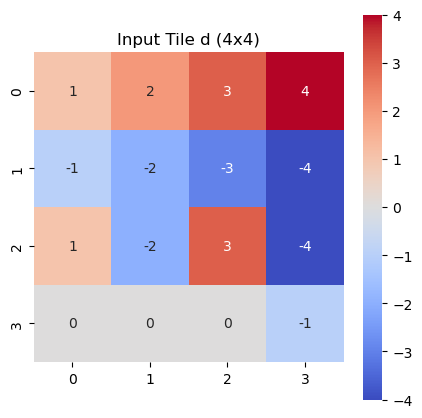

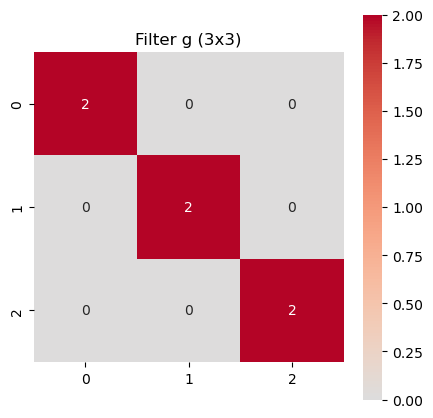

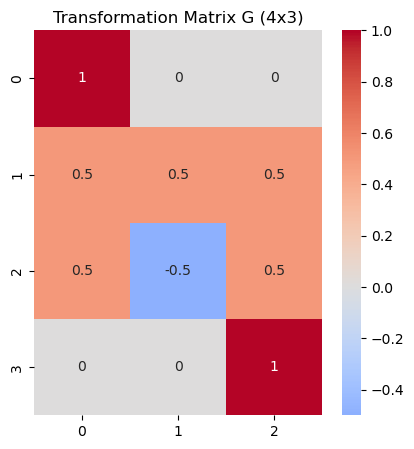

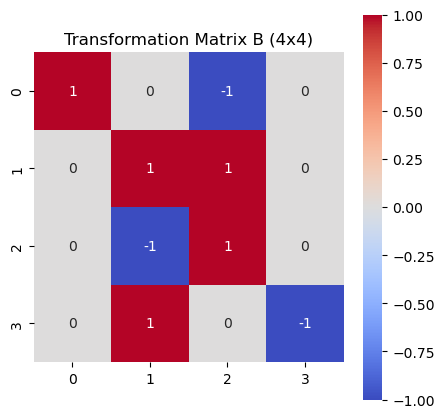

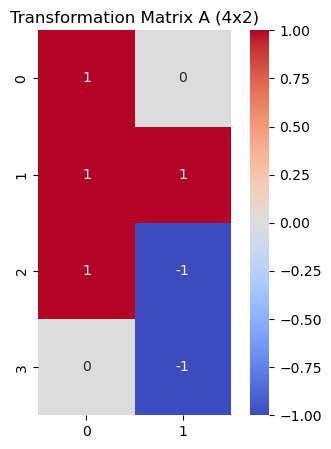

In [25]:
# Visualize input matrices
plot_heatmap(d, "Input Tile d (4x4)")
plot_heatmap(g, "Filter g (3x3)")
plot_heatmap(G, "Transformation Matrix G (4x3)")
plot_heatmap(B, "Transformation Matrix B (4x4)")
plot_heatmap(A, "Transformation Matrix A (4x2)")

In [38]:
# Step 1: Compute GgG^T
print("Step 1: Compute GgG^T")
without_floor_divide = np.dot(G, g)
print("G * g (without floor division):")
print(without_floor_divide)

Gg = floor_divide(np.dot(G, g))
print("Gg (G * g):")
print(Gg)


Step 1: Compute GgG^T
G * g (without floor division):
[[ 2.  0.  0.]
 [ 1.  1.  1.]
 [ 1. -1.  1.]
 [ 0.  0.  2.]]
Gg (G * g):
[[ 2  0  0]
 [ 1  1  1]
 [ 1 -1  1]
 [ 0  0  2]]


In [27]:
GgGt = floor_divide(np.dot(Gg, G.T))
print("\nGgG^T (G * g * G^T):")
print(GgGt)


GgG^T (G * g * G^T):
[[2 1 1 0]
 [1 1 0 1]
 [1 0 1 1]
 [0 1 1 2]]


In [33]:
# Step 2: Compute B^TdB
print("\nStep 2: Compute B^TdB")
Bt_d = np.dot(B, d)
print("B^T * d:")
print(Bt_d)


Step 2: Compute B^TdB
B^T * d:
[[ 0  4  0  8]
 [ 0 -4  0 -8]
 [ 2  0  6  0]
 [-1 -2 -3 -3]]


In [35]:
Bt_d_B = np.dot(Bt_d, B.T)
print("\nB^T * d * B:")
print(Bt_d_B)


B^T * d * B:
[[ 0  4 -4 -4]
 [ 0 -4  4  4]
 [-4  6  6  0]
 [ 2 -5 -1  1]]


In [30]:
# Step 3: Element-wise multiplication (Hadamard product)
print("\nStep 3: Element-wise multiplication (GgG^T ⊙ B^TdB)")
hadamard = floor_divide(GgGt * Bt_d_B)
print(hadamard)


Step 3: Element-wise multiplication (GgG^T ⊙ B^TdB)
[[ 2  3  4  0]
 [-2  5  0  1]
 [-1  0 -8 12]
 [ 0  1  0 -2]]


In [31]:
# Step 4: Final transformation A^T * [result] * A
print("\nStep 4: Final transformation")
A_hadamard = floor_divide(np.dot(hadamard, A))
print("Intermediate result after multiplying with A:")
print(A_hadamard)


Step 4: Final transformation
Intermediate result after multiplying with A:
[[ 9 -1]
 [ 3  4]
 [-9 -4]
 [ 1  3]]


In [32]:
Y = floor_divide(np.dot(A.T, A_hadamard))
print("\nFinal output Y:")
print(Y)


Final output Y:
[[ 3 -1]
 [11  5]]


In [39]:
# Input tile (4x4)
d = np.array([
    [1, 2, 3, 4],
    [-1, -2, -3, -4],
    [1, -2, 3, -4],
    [0, 0, 0, -1]
])

# Kernel (3x3)
g = np.array([
    [2, 0, 0],
    [0, 2, 0],
    [0, 0, 2]
])

# Perform normal convolution
output = np.zeros((2, 2))

for i in range(2):
    for j in range(2):
        # Extract the 3x3 patch from d
        patch = d[i:i+3, j:j+3]
        # Element-wise multiply and sum
        output[i, j] = np.sum(patch * g)

print("Normal convolution output (2x2):")
print(output)

Normal convolution output (2x2):
[[  4. -10.]
 [ -6.   0.]]


In [40]:
BT_d_B = np.array([
    [0, 4, -4, -4],
    [0, -4, 4, 4],
    [-4, 6, 6, 0],
    [2, -5, -1, 1]
])

G_g_GT = np.array([
    [2, 2, 2, 0],
    [2, 6, 2, 2],
    [2, 2, 6, 2],
    [0, 2, 2, 2]
])

print(np.dot(BT_d_B, G_g_GT))

[[  0   8 -24  -8]
 [  0  -8  24   8]
 [ 16  40  40  24]
 [ -8 -26 -10 -10]]


In [43]:
ewmm_output = np.array([
    [  0,   8, -24,  -8],
    [  0,  -8,  24,   8],
    [ 16,  40,  40,  24],
    [ -8, -26, -10, -10]
])


ewmm_output_right_shifts = np.array([
    [  0>>1,   8>>2, -24>>2,  -8>>1],
    [  0>>1,  -8>>2,  24>>2,   8>>1],
    [ 16>>1,  40>>2,  40>>2,  24>>1],
    [ -8>>1, -26>>2, -10>>2, -10>>1]
])


print(ewmm_output_right_shifts)

[[ 0  2 -6 -4]
 [ 0 -2  6  4]
 [ 8 10 10 12]
 [-4 -7 -3 -5]]


In [49]:
A = np.array([
    [1, 0],
    [1, 1],
    [1, -1],
    [0, -1]
])

output_temp = np.dot(A.T, ewmm_output)
print(output_temp)
# [[ 16  40  40  24]
#  [ -8 -22  -6  -6]]


output = np.dot(output_temp, A)
print(output)


output_right_shifted = np.array([
    [(16 >> 1) + (40 >> 2) + (40 >> 2),    (40 >> 2) - (40 >> 2) - (24 >> 1)],
    [(-8 >> 1) + (-22 >> 2) + (-6 >> 2),   (-22 >> 2) - (-6 >> 2) - (-6 >> 1)],
])

print(output_right_shifted)

[[ 16  40  40  24]
 [ -8 -22  -6  -6]]
[[ 96 -24]
 [-36 -10]]
[[ 28 -12]
 [-12  -1]]


Input tile d (4x4):
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]

Kernel g (3x3):
[[8 0 8]
 [0 8 0]
 [8 0 8]]

G_g = G.g (First kernel transformation):
[[ 8.  0.  8.]
 [ 8.  4.  8.]
 [ 8. -4.  8.]
 [ 8.  0.  8.]]

GgG = (G_g).G' (Complete kernel transformation):
[[ 8.  8.  8.  8.]
 [ 8. 10.  6.  8.]
 [ 8.  6. 10.  8.]
 [ 8.  8.  8.  8.]]

BT_d = B'.d (First input transformation):
[[-8 -8 -8 -8]
 [14 16 18 20]
 [ 4  4  4  4]
 [-8 -8 -8 -8]]

BdB = (BT_d).B (Complete input transformation):
[[  0 -16   0   0]
 [ -4  34   2  -4]
 [  0   8   0   0]
 [  0 -16   0   0]]

eww_output = (BdB) * (GgG) (Element-wise multiplication):
[[   0. -128.    0.    0.]
 [ -32.  340.   12.  -32.]
 [   0.   48.    0.    0.]
 [   0. -128.    0.    0.]]

out_temp = A'.eww_output (First output transformation):
[[-32. 260.  12. -32.]
 [-32. 420.  12. -32.]]

out = out_temp.A (Final output 2x2):
[[240. 280.]
 [400. 440.]]

Direct convolution result (for verification):
[[240. 280.]
 [400. 440.]]

Do

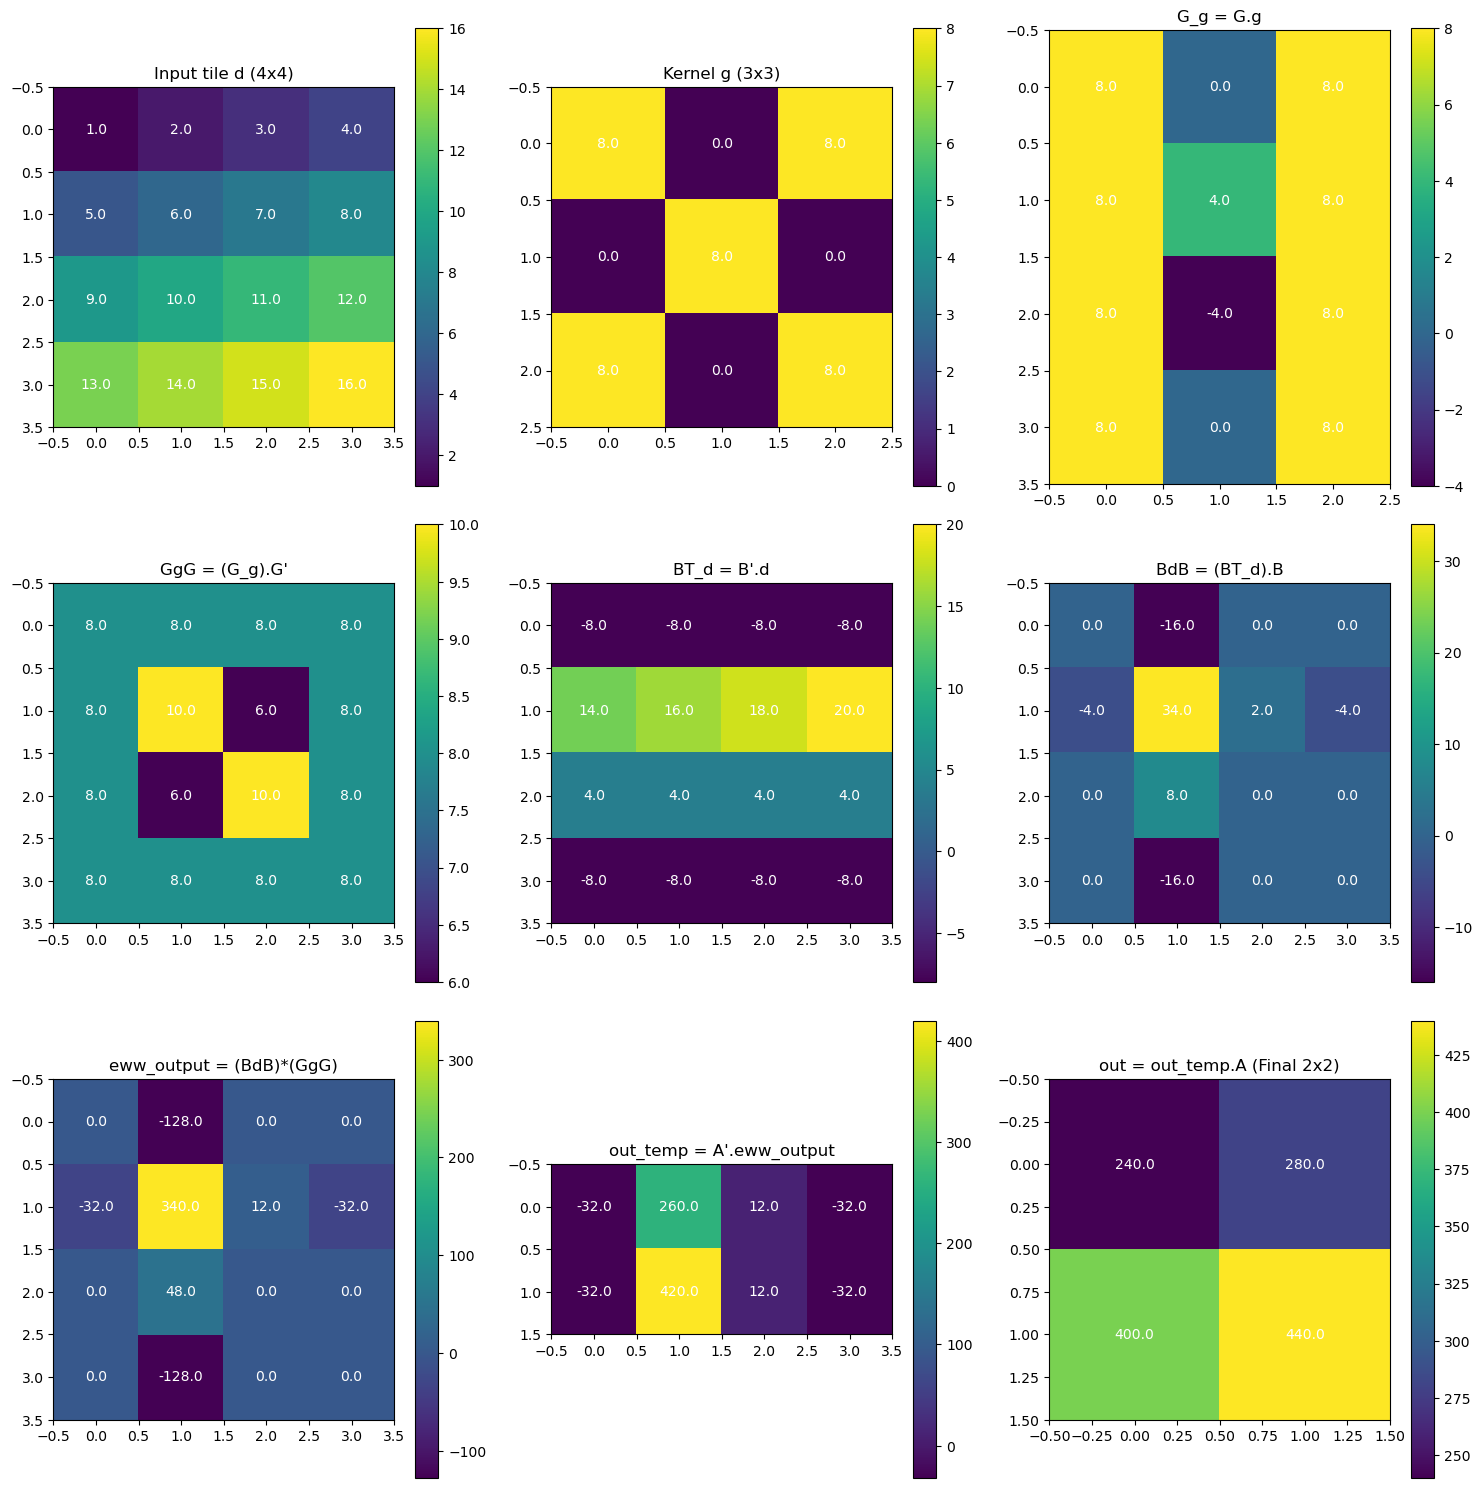

In [ ]:
# Define transformation matrices

# For F(2,3) - transforming 3x3 filter to produce 2x2 output

# G matrix for transforming kernel g
G = np.array([
    [1, 0, 0],
    [0.5, 0.5, 0.5],
    [0.5, -0.5, 0.5],
    [0, 0, 1]
])

# B^T matrix for transforming input d
B = np.array([
    [1, 0, 0, 0],
    [0,  1, -1, 1],
    [-1, 1, 1, 0],
    [0, 0, 0, -1]
])


# A^T matrix for transforming output
A = np.array([
    [1, 1, 1, 0],
    [0, 1, -1, -1]
])

# Define example input tile (4x4) and kernel (3x3)
d = np.array([
    [1,2,3,4],
    [5,6,7,8],
    [9,10,11,12],
    [13,14,15,16],
])

g = np.array([
    [8, 0, 8],
    [0, 8, 0],
    [8, 0, 8]
])

print("Input tile d (4x4):")
print(d)
print("\nKernel g (3x3):")
print(g)

# Step 1: Transform kernel g using G
# G_g = G.g
G_g = np.dot(G, g)
print("\nG_g = G.g (First kernel transformation):")
print(G_g)

# Step 2: Complete kernel transformation
# GgG = (G_g) . G'
GgG = np.dot(G_g, G.T)
print("\nGgG = (G_g).G' (Complete kernel transformation):")
print(GgG)

# Step 3: Transform input d using B
# BT_d = B'.d
BT_d = np.dot(B.T, d)
print("\nBT_d = B'.d (First input transformation):")
print(BT_d)

# Step 4: Complete input transformation
# BdB = (BT_d).B
BdB = np.dot(BT_d, B)
print("\nBdB = (BT_d).B (Complete input transformation):")
print(BdB)

# Step 5: Element-wise multiplication of transformed input and kernel
# eww_output = (BdB) * (GgG)
eww_output = BdB * GgG  # Element-wise multiplication
print("\neww_output = (BdB) * (GgG) (Element-wise multiplication):")
print(eww_output)

# Step 6: First transformation of the output
# out_temp = A'.eww_output
out_temp = np.dot(A, eww_output)
print("\nout_temp = A'.eww_output (First output transformation):")
print(out_temp)

# Step 7: Final output transformation
# out = out_temp.A
out = np.dot(out_temp, A.T)
print("\nout = out_temp.A (Final output 2x2):")
print(out)

# Let's verify with direct convolution for comparison
def direct_convolution(input_tile, kernel):
    """Perform direct convolution of input with kernel."""
    k_h, k_w = kernel.shape
    i_h, i_w = input_tile.shape
    o_h, o_w = i_h - k_h + 1, i_w - k_w + 1
    
    output = np.zeros((o_h, o_w))
    
    for i in range(o_h):
        for j in range(o_w):
            output[i, j] = np.sum(input_tile[i:i+k_h, j:j+k_w] * kernel)
    
    return output

# Calculate direct convolution for verification
direct_output = direct_convolution(d, g)
print("\nDirect convolution result (for verification):")
print(direct_output)

# Check if the results match
print("\nDo Winograd and direct convolution results match?")
print(np.allclose(out, direct_output))

# Visualize the matrices for better understanding
def visualize_matrices():
    """Create visualizations of all intermediate matrices."""
    fig, axs = plt.subplots(3, 3, figsize=(15, 15))
    
    matrices = [
        (d, "Input tile d (4x4)"),
        (g, "Kernel g (3x3)"),
        (G_g, "G_g = G.g"),
        (GgG, "GgG = (G_g).G'"),
        (BT_d, "BT_d = B'.d"),
        (BdB, "BdB = (BT_d).B"),
        (eww_output, "eww_output = (BdB)*(GgG)"),
        (out_temp, "out_temp = A'.eww_output"),
        (out, "out = out_temp.A (Final 2x2)")
    ]
    
    for i, (matrix, title) in enumerate(matrices):
        ax = axs[i//3, i%3]
        im = ax.imshow(matrix, cmap='viridis')
        ax.set_title(title)
        plt.colorbar(im, ax=ax)
        
        # Add text annotations
        for i_idx in range(matrix.shape[0]):
            for j_idx in range(matrix.shape[1]):
                ax.text(j_idx, i_idx, f"{matrix[i_idx, j_idx]:.1f}",
                        ha="center", va="center", color="white")
    
    plt.tight_layout()
    plt.show()

visualize_matrices()

In [ ]:
x = np.array(
    [[240., 280.],
    [400. ,440.]])


y = np.array([
    [96., 96.],
    [96., 96.]])

z = np.array([
    [ 16., -40.],
    [-24. ,  0.]])


print(x+y+z)

# 116 /4 => 29


[[352. 336.]
 [472. 536.]]


In [71]:
28*3

84

In [70]:
s = '00000001110110000000000000000000111011000000000000000000100001100000000000000000010000110000000000000000001000011000'
print(len(s))

o3 = s[0:28]
o2 = s[29:57]
o1 = s[58:86]
o0 = s[87:115]
print(o3)
print(o2)
print(o1)
print(o0)
print(bin(int(o3, 2)))

116
0000000111011000000000000000
0001110110000000000000000001
0001100000000000000000010000
1000000000000000000100001100
0b111011000000000000000


In [ ]:
(16 + 13 )* 4 

116